In [18]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
import pandas as pd
from pingouin import mixed_anova, anova, pairwise_tukey, pairwise_ttests
from statsmodels.regression.mixed_linear_model import MixedLM

import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities_ES as u

ko_mice = stx.ymaze_sess_deets.ko_vr_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_vr_mice
plt.rcParams['pdf.fonttype']=42

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# fig_dir = "/mnt/BigDisk/YMazeResults/behavior"
# os.makedirs(fig_dir,exist_ok=True)
dt = 15.46

In [20]:
print(ko_mice)

('4467975.1', '4467975.2', '4467975.3', '4467975.4', '4467975.5', 'Cre7', 'Cre9', 'CA3-1')


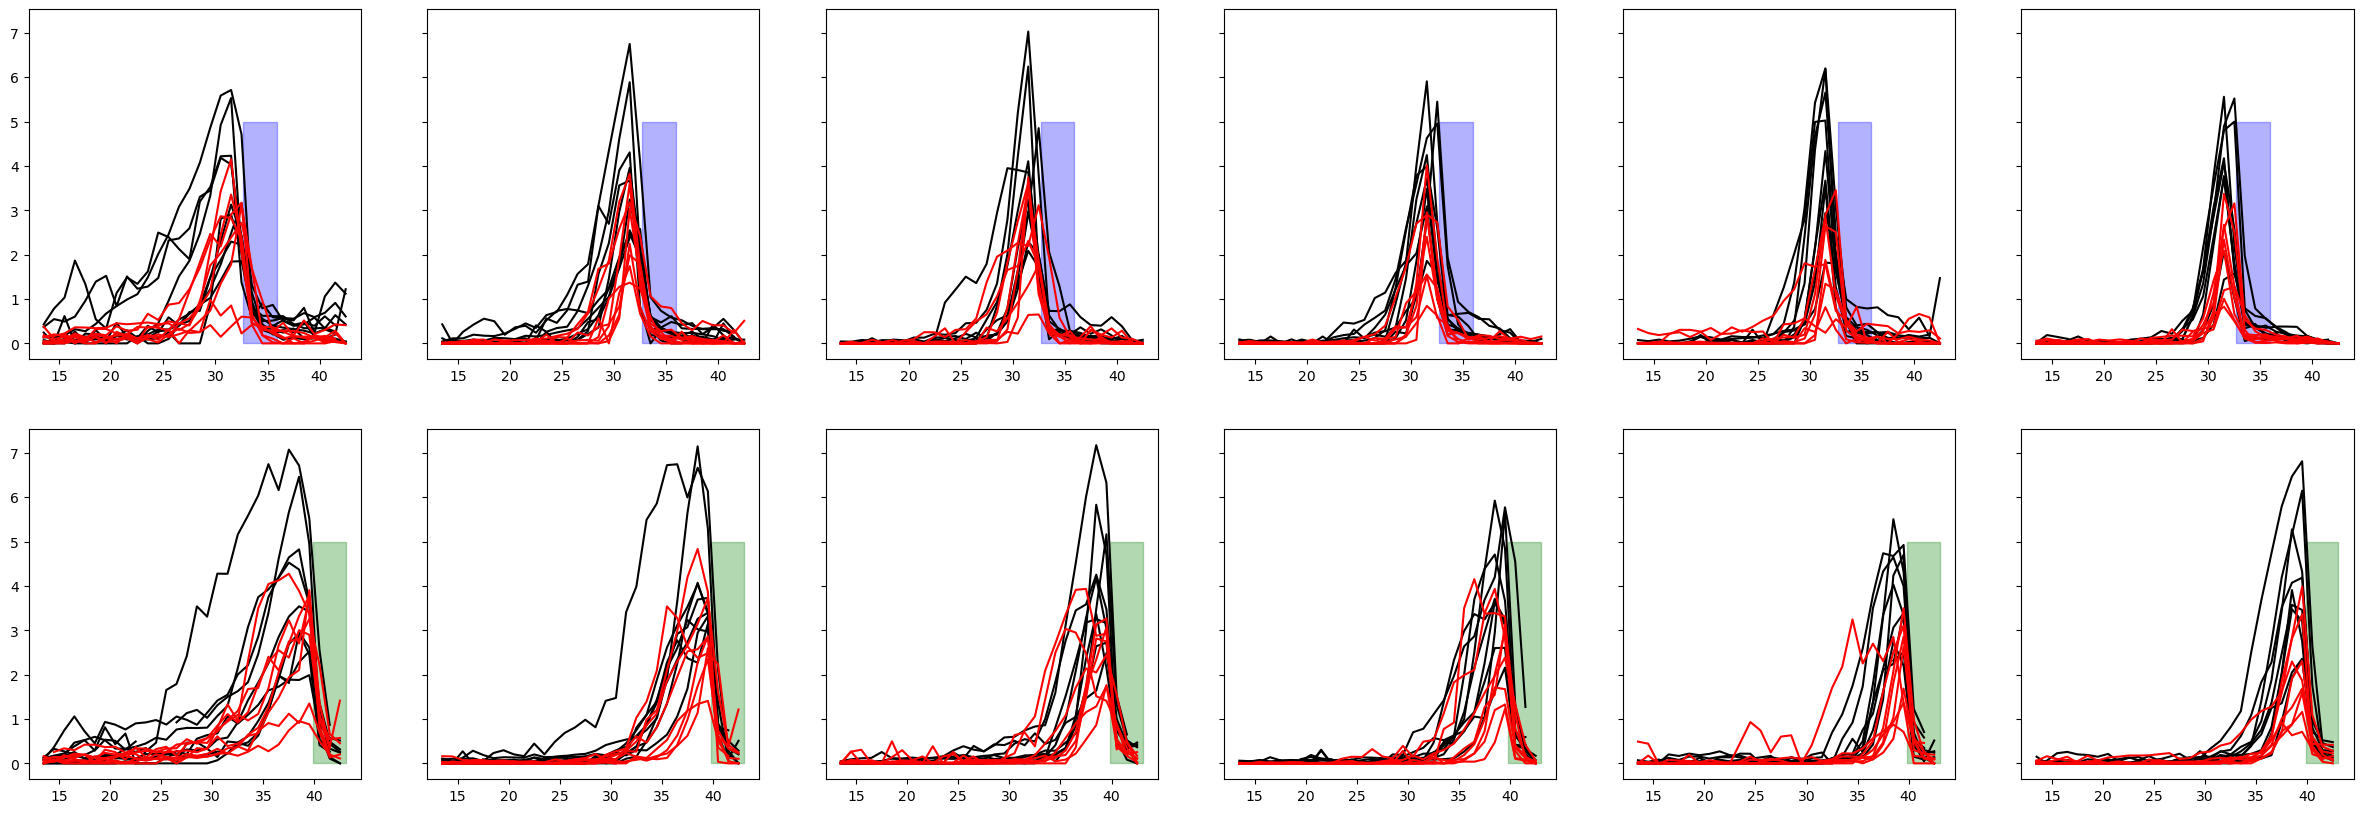

In [7]:
fig, ax = plt.subplots(2,6,figsize=[30,10], sharey=True)

ko_lr = {}
ctrl_lr = {}
for day in range(6):
    
    ctrl_lr[day]={'left':[],'right':[]}
    for i, mouse in enumerate(ctrl_mice):
        sess = u.load_vr_day(mouse,day, trial_mat_keys = ('licks','nonconsum_licks','speed'),verbose = False)
        
        ax[0,day].plot(sess.trial_matrices['bin_centers'], dt*sess.trial_matrices['licks'][sess.trial_info['LR']==-1,:].mean(axis=0),color='black')
        ax[1,day].plot(sess.trial_matrices['bin_centers'], dt*sess.trial_matrices['licks'][sess.trial_info['LR']==1,:].mean(axis=0),color='black')
        
        if i == 0:
            ax[1,day].fill_betweenx([0,5], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
            ax[0,day].fill_betweenx([0,5],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)
            
            t_bins = sess.trial_matrices['bin_edges'][1:]
            rzone_early = (t_bins>=sess.rzone_early['tfront']-3)*(t_bins<=sess.rzone_early['tfront'])
            rzone_late = (t_bins>=sess.rzone_late['tfront']-3)*(t_bins<=sess.rzone_late['tfront'])
            
        ctrl_lr[day]['left'].append(dt*np.nanmean(sess.trial_matrices['licks'][sess.trial_info['LR']==-1,:][:,rzone_early]))
        ctrl_lr[day]['right'].append(dt*np.nanmean(sess.trial_matrices['licks'][sess.trial_info['LR']==1,:][:,rzone_late]))
        
    ko_lr[day]={'left':[],'right':[]}
    for i, mouse in enumerate(ko_mice):
        try:
            sess = u.load_vr_day(mouse,day, verbose=False)
            trial_mask = sess.trial_info['LR']==-1
            if day==0 and i == 3:
                trial_mask[35:66]=False

            ax[0,day].plot(sess.trial_matrices['bin_centers'], dt*sess.trial_matrices['licks'][trial_mask,:].mean(axis=0),color='red')
            ax[1,day].plot(sess.trial_matrices['bin_centers'], dt*sess.trial_matrices['licks'][sess.trial_info['LR']==1,:].mean(axis=0),color='red')

            ko_lr[day]['left'].append(dt*np.nanmean(sess.trial_matrices['licks'][trial_mask,:][:,rzone_early]))
            ko_lr[day]['right'].append(dt*np.nanmean(sess.trial_matrices['licks'][sess.trial_info['LR']==1,:][:,rzone_late]))
        except:
            pass

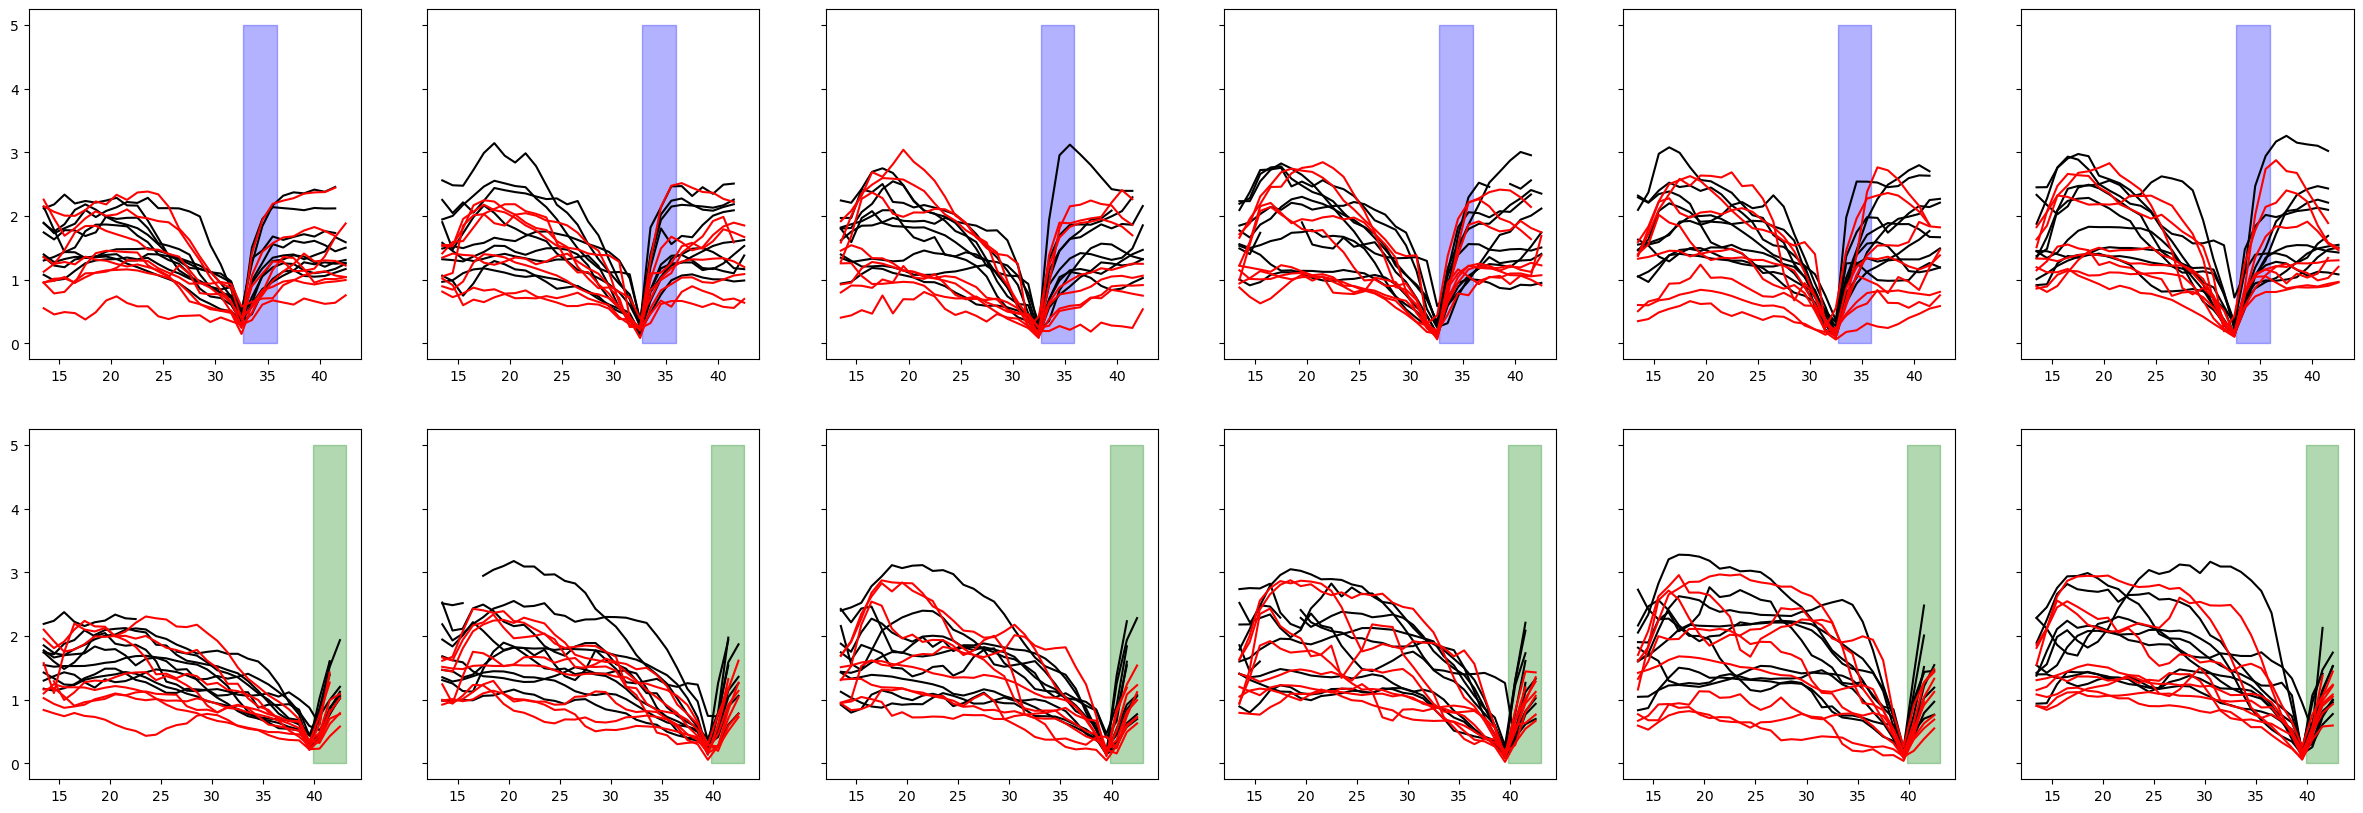

In [21]:
fig, ax = plt.subplots(2,6,figsize=[30,10], sharey=True)

ko_lr = {}
ctrl_lr = {}
for day in range(6):
    
    ctrl_lr[day]={'left':[],'right':[]}
    for i, mouse in enumerate(ctrl_mice):
        sess = u.load_vr_day(mouse,day, trial_mat_keys = ('licks','nonconsum_licks','speed'),verbose = False)
        
        ax[0,day].plot(sess.trial_matrices['bin_centers'], dt*sess.trial_matrices['speed'][sess.trial_info['LR']==-1,:].mean(axis=0),color='black')
        ax[1,day].plot(sess.trial_matrices['bin_centers'], dt*sess.trial_matrices['speed'][sess.trial_info['LR']==1,:].mean(axis=0),color='black')
        
        if i == 0:
            ax[1,day].fill_betweenx([0,5], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
            ax[0,day].fill_betweenx([0,5],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)
            
            t_bins = sess.trial_matrices['bin_edges'][1:]
            rzone_early = (t_bins>=sess.rzone_early['tfront']-3)*(t_bins<=sess.rzone_early['tfront'])
            rzone_late = (t_bins>=sess.rzone_late['tfront']-3)*(t_bins<=sess.rzone_late['tfront'])
            
        ctrl_lr[day]['left'].append(dt*np.nanmean(sess.trial_matrices['speed'][sess.trial_info['LR']==-1,:][:,rzone_early]))
        ctrl_lr[day]['right'].append(dt*np.nanmean(sess.trial_matrices['speed'][sess.trial_info['LR']==1,:][:,rzone_late]))
        
    ko_lr[day]={'left':[],'right':[]}
    for i, mouse in enumerate(ko_mice):
        try:
            sess = u.load_vr_day(mouse,day, verbose=False)
            trial_mask = sess.trial_info['LR']==-1
            if day==0 and i == 3:
                trial_mask[35:66]=False

            ax[0,day].plot(sess.trial_matrices['bin_centers'], dt*sess.trial_matrices['speed'][trial_mask,:].mean(axis=0),color='red')
            ax[1,day].plot(sess.trial_matrices['bin_centers'], dt*sess.trial_matrices['speed'][sess.trial_info['LR']==1,:].mean(axis=0),color='red')

            ko_lr[day]['left'].append(dt*np.nanmean(sess.trial_matrices['speed'][trial_mask,:][:,rzone_early]))
            ko_lr[day]['right'].append(dt*np.nanmean(sess.trial_matrices['speed'][sess.trial_info['LR']==1,:][:,rzone_late]))
        except:
            pass

left day 0: t:-1.347151, p:0.177932
right day 0: t:-1.347151, p:0.177932
left day 1: t:-2.309401, p:0.020921
right day 1: t:-2.309401, p:0.020921
left day 2: t:-1.058475, p:0.289839
right day 2: t:-1.828276, p:0.067508
left day 3: t:-2.598076, p:0.009375
right day 3: t:-2.116951, p:0.034264
left day 4: t:-2.886751, p:0.003892
right day 4: t:-2.886751, p:0.003892
left day 5: t:-2.598076, p:0.009375
right day 5: t:-2.886751, p:0.003892


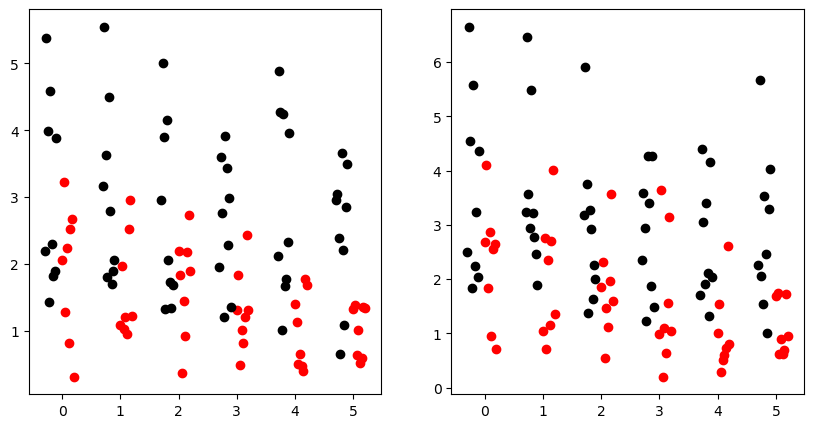

In [5]:
fig, ax = plt.subplots(1,2, figsize=[10,5])

for day in range(6):
    for ax_ind, lr in enumerate(('left', 'right')):
    
        ko = np.array(ko_lr[day][lr])
        ax[ax_ind].scatter(np.linspace(day,day+.2, num = ko.shape[0]),ko, color='red')

        ctrl = np.array(ctrl_lr[day][lr])
        ax[ax_ind].scatter(np.linspace(day-.3, day-.1, num = ctrl.shape[0]),ctrl, color='black')
    #     print(ko,ctrl)
        t,p = sp.stats.ranksums(ko,ctrl)
        print("%s day %d: t:%f, p:%f" % (lr, day,t,p))

/tmp/ipykernel_2437518/2354340833.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'mouse': mouse,
/tmp/ipykernel_2437518/2354340833.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'mouse': mouse,
/tmp/ipykernel_2437518/2354340833.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'mouse': mouse,
/tmp/ipykernel_2437518/2354340833.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'mouse': mouse,
/tmp/ipykernel_2437518/2354340833.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

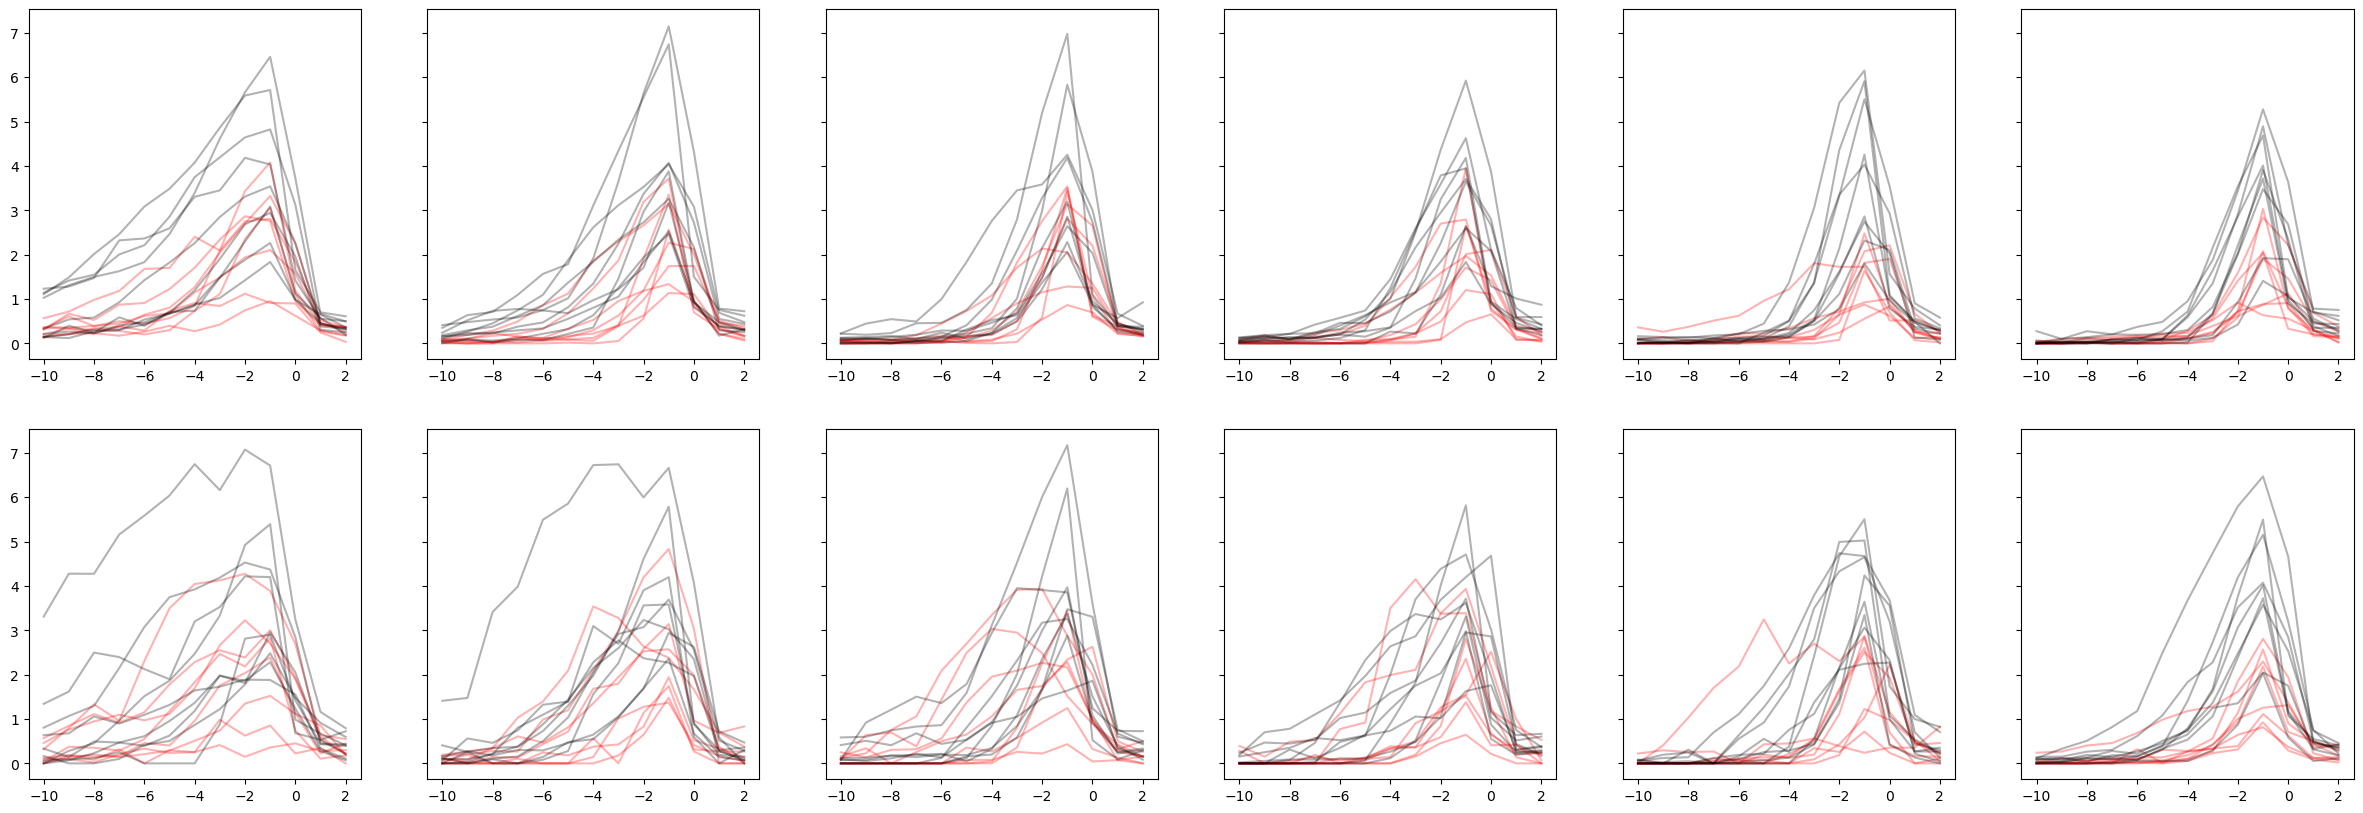

In [6]:

fig,ax = plt.subplots(2,6, figsize = [30, 10],sharey=True)


df = pd.DataFrame({'mouse':[],
                        'ko':[],
                        'day':[],
                        'day_norm': [],
                        'dz': [],
                        'ko_x_day': [],
                        'nov':[],
                        'ko_x_nov': [],
                        'lr': [],
                        'lickrate':[], 
                        'intercept': [],
                        })

key = 'nonconsum_licks'
if key in ('licks', 'nonconsum_licks'):
    alpha = dt
elif key in ('speed'):
    alpha = dt*10
else:
    alpha = 1.
ko_lr, ctrl_lr = {}, {}
for day in range(6):
    ko_lr[day] = {'fam':[],'nov':[]}
    
    x = np.arange(-10,3)
    for mouse in ko_mice:

        sess = u.load_vr_day(mouse,day, trial_mat_keys = ('licks','nonconsum_licks','licks_sum','speed'),verbose = False)
        bin_edges = sess.trial_matrices['bin_edges']
        for ax_ind, lr in enumerate([-1, 1]):
            trial_mask = sess.trial_info['LR']== lr
            
#             lick_mean = np.nanmean(sess.trial_matrices['licks_sum'][trial_mask,:].ravel())

#             mu = dt*np.nanmean(sess.trial_matrices['nonconsum_licks'][trial_mask,:], axis=0)
            
            mu = alpha*np.nanmean(sess.trial_matrices[key][trial_mask,:], axis=0)

            if sess.novel_arm ==-1:
                fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

            elif sess.novel_arm == 1:
                fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            if lr == sess.novel_arm:
                ko_lr[day]['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
#                 ko_mu[day]['nov'].append(np.nanmean(mu[nov_rzone_front-3:nov_rzone_front]))
                
                _nov = np.nanmean(mu[nov_rzone_front-3:nov_rzone_front+1])
                ax[1,day].plot(x, mu[nov_rzone_front-10:nov_rzone_front+3],color='red', alpha = .3)
                df = df.append({'mouse': mouse, 
                                 'ko': 1, 
                                 'day': day,
                                 'day_norm': (day+1)/6.,
                                 'ko_x_day': (day+1)/6.,
                                 'nov': 1,
                                 'ko_x_nov': 1,
                                 'lr':ax_ind,
                                 'lickrate': _nov,
                                 'intercept': 1,
                                }, ignore_index=True)
            else:
                ko_lr[day]['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
                _fam = np.nanmean(mu[fam_rzone_front-3:fam_rzone_front+1])
                ax[0,day].plot(x, mu[fam_rzone_front-10:fam_rzone_front+3],color='red', alpha = .3)
                df = df.append({'mouse': mouse, 
                                 'ko': 1, 
                                 'day': day,
                                 'day_norm': (day+1)/6.,
                                 'ko_x_day': (day+1)/6.,
                                 'nov': 0,
                                 'ko_x_nov': 0,
                                 'lr': ax_ind,
                                 'lickrate': _fam,
                                 'intercept': 1,
                                }, ignore_index=True)
#                 ko_mu[day]['fam'].append(np.nanmean(mu[fam_rzone_front-3:fam_rzone_front]))
                
                    
                
       
                      

    ctrl_lr[day] = {'fam':[],'nov':[]}
    x = np.arange(-10,3)
    for mouse in ctrl_mice:
        sess = u.load_vr_day(mouse,day, trial_mat_keys = ('licks','nonconsum_licks','licks_sum','speed'),verbose = False)
        bin_edges = sess.trial_matrices['bin_edges']
        for ax_ind, lr in enumerate([-1, 1]):
            trial_mask = sess.trial_info['LR']== lr
#             lick_mean = np.nanmean(sess.trial_matrices['licks_sum'][trial_mask,:].ravel())

#             mu = dt*np.nanmean(sess.trial_matrices['nonconsum_licks'][trial_mask,:], axis=0)
            mu = alpha*np.nanmean(sess.trial_matrices[key][trial_mask,:], axis=0)

            if sess.novel_arm ==-1:

                fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

            elif sess.novel_arm == 1:
                fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]

            if lr == sess.novel_arm:
                ctrl_lr[day]['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
#                 ctrl_mu[day]['nov'].append(np.nanmean(mu[nov_rzone_front-3:nov_rzone_front]))
                _nov = np.nanmean(mu[nov_rzone_front-3:nov_rzone_front+1])
                ax[1,day].plot(x, mu[nov_rzone_front-10:nov_rzone_front+3],color='black', alpha = .3)
                df = df.append({'mouse': mouse, 
                                 'ko': 0, 
                                 'day': day,
                                 'day_norm': (day+1)/6.,
                                 'ko_x_day': 0,
                                 'nov': 1,
                                 'ko_x_nov': 0,
                                 'lr': ax_ind,
                                 'lickrate': _nov,
                                 'intercept': 1,
                                }, ignore_index=True)
            else:
                ctrl_lr[day]['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
#                 ctrl_mu[day]['fam'].append(np.nanmean(mu[fam_rzone_front-3:fam_rzone_front]))
                _fam = np.nanmean(mu[fam_rzone_front-3:fam_rzone_front+1])
                ax[0,day].plot(x, mu[fam_rzone_front-10:fam_rzone_front+3],color='black', alpha = .3)
                
                df = df.append({'mouse': mouse, 
                                 'ko': 0, 
                                 'day': day,
                                 'day_norm': (day+1)/6.,
                                 'ko_x_day': 0,
                                 'nov': 0,
                                 'ko_x_nov': 0,
                                 'lr': ax_ind,
                                 'lickrate': _fam,
                                 'intercept': 1,
                                }, ignore_index=True)
        
    

# for day in range(6):
#     for ax_ind, lr in enumerate(['fam', 'nov']):
#         arr = np.array(ko_lr[day][lr])
#         mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
#         ax[ax_ind,day].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)

#         arr = np.array(ctrl_lr[day][lr])
#         mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
#         ax[ax_ind, day].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     #     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
#         ax[ax_ind, day].fill_betweenx([0,5], 0, 2, zorder=-1, color='purple',alpha=.3)
#         ax[ax_ind, day].fill_betweenx([0,5], 0, 2, zorder=-1, color='purple',alpha=.3)

#         ax[ax_ind, day].set_xlabel('Position')
#         ax[ax_ind, day].set_xlabel('Position')
#         ax[ax_ind, day].set_ylabel('Lick Rate')
#         ax[ax_ind, day].spines['top'].set_visible(False)
#         ax[ax_ind, day].spines['top'].set_visible(False)
#         ax[ax_ind, day].spines['right'].set_visible(False)
#         ax[ax_ind, day].spines['right'].set_visible(False)

# fig.savefig(os.path.join(fig_dir, 'famnov_lickrate_alldays.pdf'))



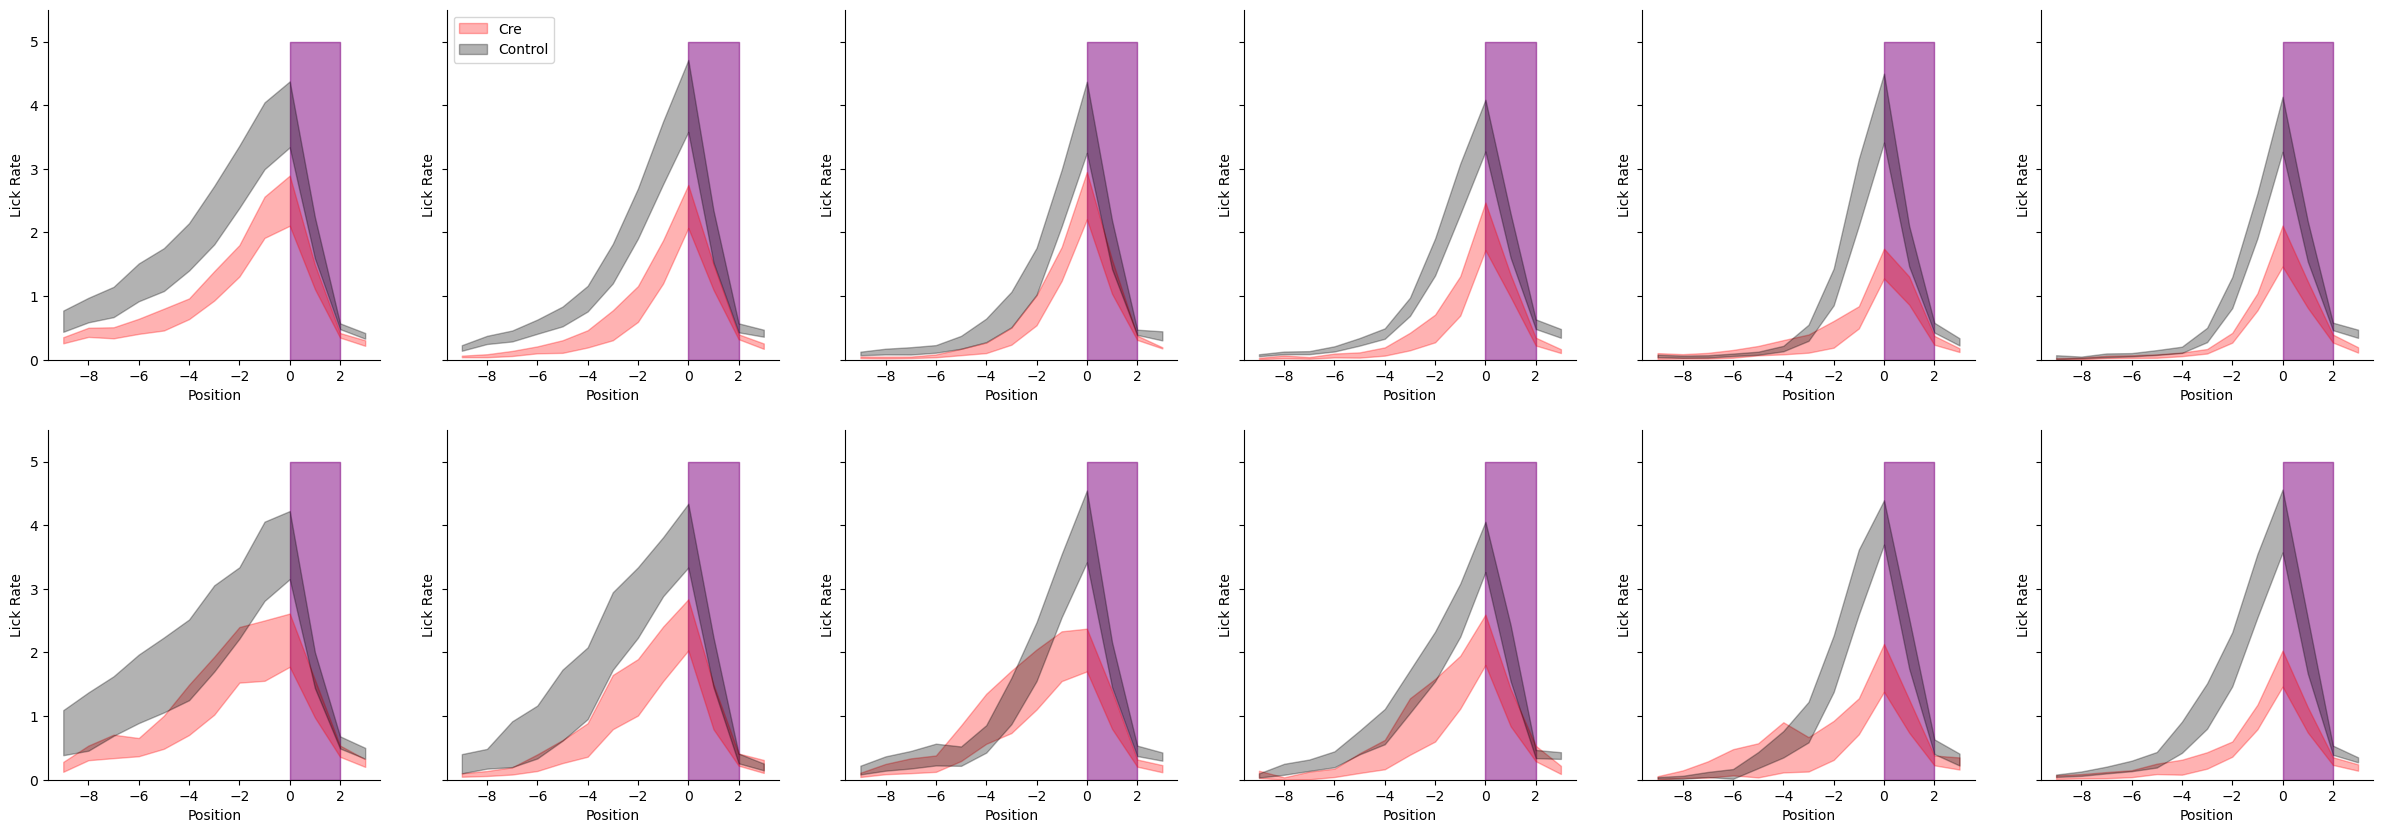

In [12]:
fig,ax = plt.subplots(2,6, figsize = [30, 10],sharey=True)


df = {'mouse':[],
      'ko':[],
      'day':[],
      'nov':[],
      'lickrate': [],
      }

key = 'nonconsum_licks'
if key in ('licks', 'nonconsum_licks'):
    alpha = dt
elif key in ('speed'):
    alpha = dt*10
else:
    alpha = 1.
ko_lr, ctrl_lr = {}, {}
for day in range(6):
    ko_lr[day] = {'fam':[],'nov':[]}
    
    x = np.arange(-10,3)
    for mouse in ko_mice:

        sess = u.load_vr_day(mouse,day, trial_mat_keys = ('licks','nonconsum_licks','licks_sum','speed'),verbose = False)
        bin_edges = sess.trial_matrices['bin_edges']
        for ax_ind, lr in enumerate([-1, 1]):
            trial_mask = sess.trial_info['LR']== lr
#             lick_mean = np.nanmean(sess.trial_matrices['licks_sum'][trial_mask,:].ravel())

#             mu = dt*np.nanmean(sess.trial_matrices['nonconsum_licks'][trial_mask,:], axis=0)
            
            mu = alpha*np.nanmean(sess.trial_matrices[key][trial_mask,:], axis=0)

            if sess.novel_arm ==-1:
                fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

            elif sess.novel_arm == 1:
                fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            if lr == sess.novel_arm:
                ko_lr[day]['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
#                 ko_mu[day]['nov'].append(np.nanmean(mu[nov_rzone_front-3:nov_rzone_front]))
                
                _nov = np.nanmean(mu[nov_rzone_front-3:nov_rzone_front+1])
                df['mouse'].append(mouse)
                df['ko'].append('ko')
                df['day'].append(day)
                df['nov'].append('nov')
                df['lickrate'].append(_nov)
            
            
                # df = df.append({'mouse': mouse, 
                #                  'ko': 1, 
                #                  'day': day,
                #                  'day_norm': (day+1)/6.,
                #                  'ko_x_day': (day+1)/6.,
                #                  'nov': 1,
                #                  'ko_x_nov': 1,
                #                  'lr':ax_ind,
                #                  'lickrate': _nov,
                #                  'intercept': 1,
                #                 }, ignore_index=True)
            else:
                ko_lr[day]['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
                _fam = np.nanmean(mu[fam_rzone_front-3:fam_rzone_front+1])
                df['mouse'].append(mouse)
                df['ko'].append('ko')
                df['day'].append(day)
                df['nov'].append('fam')
                df['lickrate'].append(_fam)
                # df = df.append({'mouse': mouse, 
                #                  'ko': 1, 
                #                  'day': day,
                #                  'day_norm': (day+1)/6.,
                #                  'ko_x_day': (day+1)/6.,
                #                  'nov': 0,
                #                  'ko_x_nov': 0,
                #                  'lr': ax_ind,
                #                  'lickrate': _fam,
                #                  'intercept': 1,
                #                 }, ignore_index=True)
#                 ko_mu[day]['fam'].append(np.nanmean(mu[fam_rzone_front-3:fam_rzone_front]))
                
                    
                
    
                      

    ctrl_lr[day] = {'fam':[],'nov':[]}
    x = np.arange(-9,4)
    for mouse in ctrl_mice:
        sess = u.load_vr_day(mouse,day, trial_mat_keys = ('licks','nonconsum_licks','licks_sum','speed'),verbose = False)
        bin_edges = sess.trial_matrices['bin_edges']
        for ax_ind, lr in enumerate([-1, 1]):
            trial_mask = sess.trial_info['LR']== lr
#             lick_mean = np.nanmean(sess.trial_matrices['licks_sum'][trial_mask,:].ravel())

#             mu = dt*np.nanmean(sess.trial_matrices['nonconsum_licks'][trial_mask,:], axis=0)
            mu = alpha*np.nanmean(sess.trial_matrices[key][trial_mask,:], axis=0)

            if sess.novel_arm ==-1:

                fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

            elif sess.novel_arm == 1:
                fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]

            if lr == sess.novel_arm:
                ctrl_lr[day]['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
#                 ctrl_mu[day]['nov'].append(np.nanmean(mu[nov_rzone_front-3:nov_rzone_front]))
                _nov = np.nanmean(mu[nov_rzone_front-3:nov_rzone_front+1])
                df['mouse'].append(mouse)
                df['ko'].append('ctrl')
                df['day'].append(day)
                df['nov'].append('nov')
                df['lickrate'].append(_nov)
                # df = df.append({'mouse': mouse, 
                #                  'ko': 0, 
                #                  'day': day,
                #                  'day_norm': (day+1)/6.,
                #                  'ko_x_day': 0,
                #                  'nov': 1,
                #                  'ko_x_nov': 0,
                #                  'lr': ax_ind,
                #                  'lickrate': _nov,
                #                  'intercept': 1,
                #                 }, ignore_index=True)
            else:
                ctrl_lr[day]['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
#                 ctrl_mu[day]['fam'].append(np.nanmean(mu[fam_rzone_front-3:fam_rzone_front]))
                _fam = np.nanmean(mu[fam_rzone_front-3:fam_rzone_front+1])
                df['mouse'].append(mouse)
                df['ko'].append('ctrl')
                df['day'].append(day)
                df['nov'].append('fam')
                df['lickrate'].append(_fam)
                # df = df.append({'mouse': mouse, 
                #                  'ko': 0, 
                #                  'day': day,
                #                  'day_norm': (day+1)/6.,
                #                  'ko_x_day': 0,
                #                  'nov': 0,
                #                  'ko_x_nov': 0,
                #                  'lr': ax_ind,
                #                  'lickrate': _fam,
                #                  'intercept': 1,
                #                 }, ignore_index=True)
            
df = pd.DataFrame(df)
        
    

for day in range(6):
    for ax_ind, lr in enumerate(['fam', 'nov']):
        arr = np.array(ko_lr[day][lr])
        mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
        ax[ax_ind,day].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3, label='Cre')

        arr = np.array(ctrl_lr[day][lr])
        mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
        ax[ax_ind, day].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3, label='Control')
    #     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
        ax[ax_ind, day].fill_betweenx([0,5], 0, 2, zorder=-1, color='purple',alpha=.3)
        ax[ax_ind, day].fill_betweenx([0,5], 0, 2, zorder=-1, color='purple',alpha=.3)

        ax[ax_ind, day].set_xlabel('Position')
        ax[ax_ind, day].set_xlabel('Position')
        ax[ax_ind, day].set_ylabel('Lick Rate')
        ax[ax_ind, day].spines['top'].set_visible(False)
        ax[ax_ind, day].spines['top'].set_visible(False)
        ax[ax_ind, day].spines['right'].set_visible(False)
        ax[ax_ind, day].spines['right'].set_visible(False)
        ax[ax_ind, day].set_ylim([0,5.5])
ax[0,1].legend(loc = 'upper left')

fig.savefig(os.path.join(fig_dir, 'famnov_lickrate_alldays.pdf'))

In [16]:
aov = mixed_anova(data=df[df['nov']=='nov'], dv='lickrate', between='ko', within='day', subject='mouse')
print(aov)
print(aov['p-unc'].iloc[1])

posthoc = pairwise_ttests(data=df[df['nov']=='nov'], dv='lickrate', between='ko', within='day', subject='mouse', padjust = 'holm')
print(posthoc)

        Source         SS  DF1  DF2         MS         F     p-unc       np2  \
0           ko  42.832149    1   15  42.832149  8.402531  0.011023  0.359044   
1          day   3.424709    5   75   0.684942  2.011024  0.086710  0.118219   
2  Interaction   2.254700    5   75   0.450940  1.323982  0.263227  0.081107   

       eps  
0      NaN  
1  0.70181  
2      NaN  
0.08670957015921336
    Contrast day     A   B Paired  Parametric         T        dof  \
0        day   -     0   1   True        True  0.133476  16.000000   
1        day   -     0   2   True        True  1.009938  16.000000   
2        day   -     0   3   True        True  1.420135  16.000000   
3        day   -     0   4   True        True  1.663410  16.000000   
4        day   -     0   5   True        True  2.199804  16.000000   
5        day   -     1   2   True        True  1.337315  16.000000   
6        day   -     1   3   True        True  1.619456  16.000000   
7        day   -     1   4   True        True  

/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:383: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "B"

In [17]:
aov = mixed_anova(data=df[df['nov']=='fam'], dv='lickrate', between='ko', within='day', subject='mouse')
print(aov)
print(aov['p-unc'].iloc[1])

posthoc = pairwise_ttests(data=df[df['nov']=='fam'], dv='lickrate', between='ko', within='day', subject='mouse', padjust = 'holm')
print(posthoc)

        Source         SS  DF1  DF2         MS          F     p-unc       np2  \
0           ko  37.903867    1   15  37.903867  10.663782  0.005215  0.415519   
1          day   9.413276    5   75   1.882655   7.556441  0.000009  0.335001   
2  Interaction   0.997572    5   75   0.199514   0.800794  0.552612  0.050681   

        eps  
0       NaN  
1  0.688216  
2       NaN  
8.614145765397674e-06
    Contrast day     A   B Paired  Parametric         T        dof  \
0        day   -     0   1   True        True  1.398939  16.000000   
1        day   -     0   2   True        True  2.754402  16.000000   
2        day   -     0   3   True        True  3.180116  16.000000   
3        day   -     0   4   True        True  4.929344  16.000000   
4        day   -     0   5   True        True  4.374278  16.000000   
5        day   -     1   2   True        True  1.984348  16.000000   
6        day   -     1   3   True        True  3.010909  16.000000   
7        day   -     1   4   True    

/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:383: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "B"

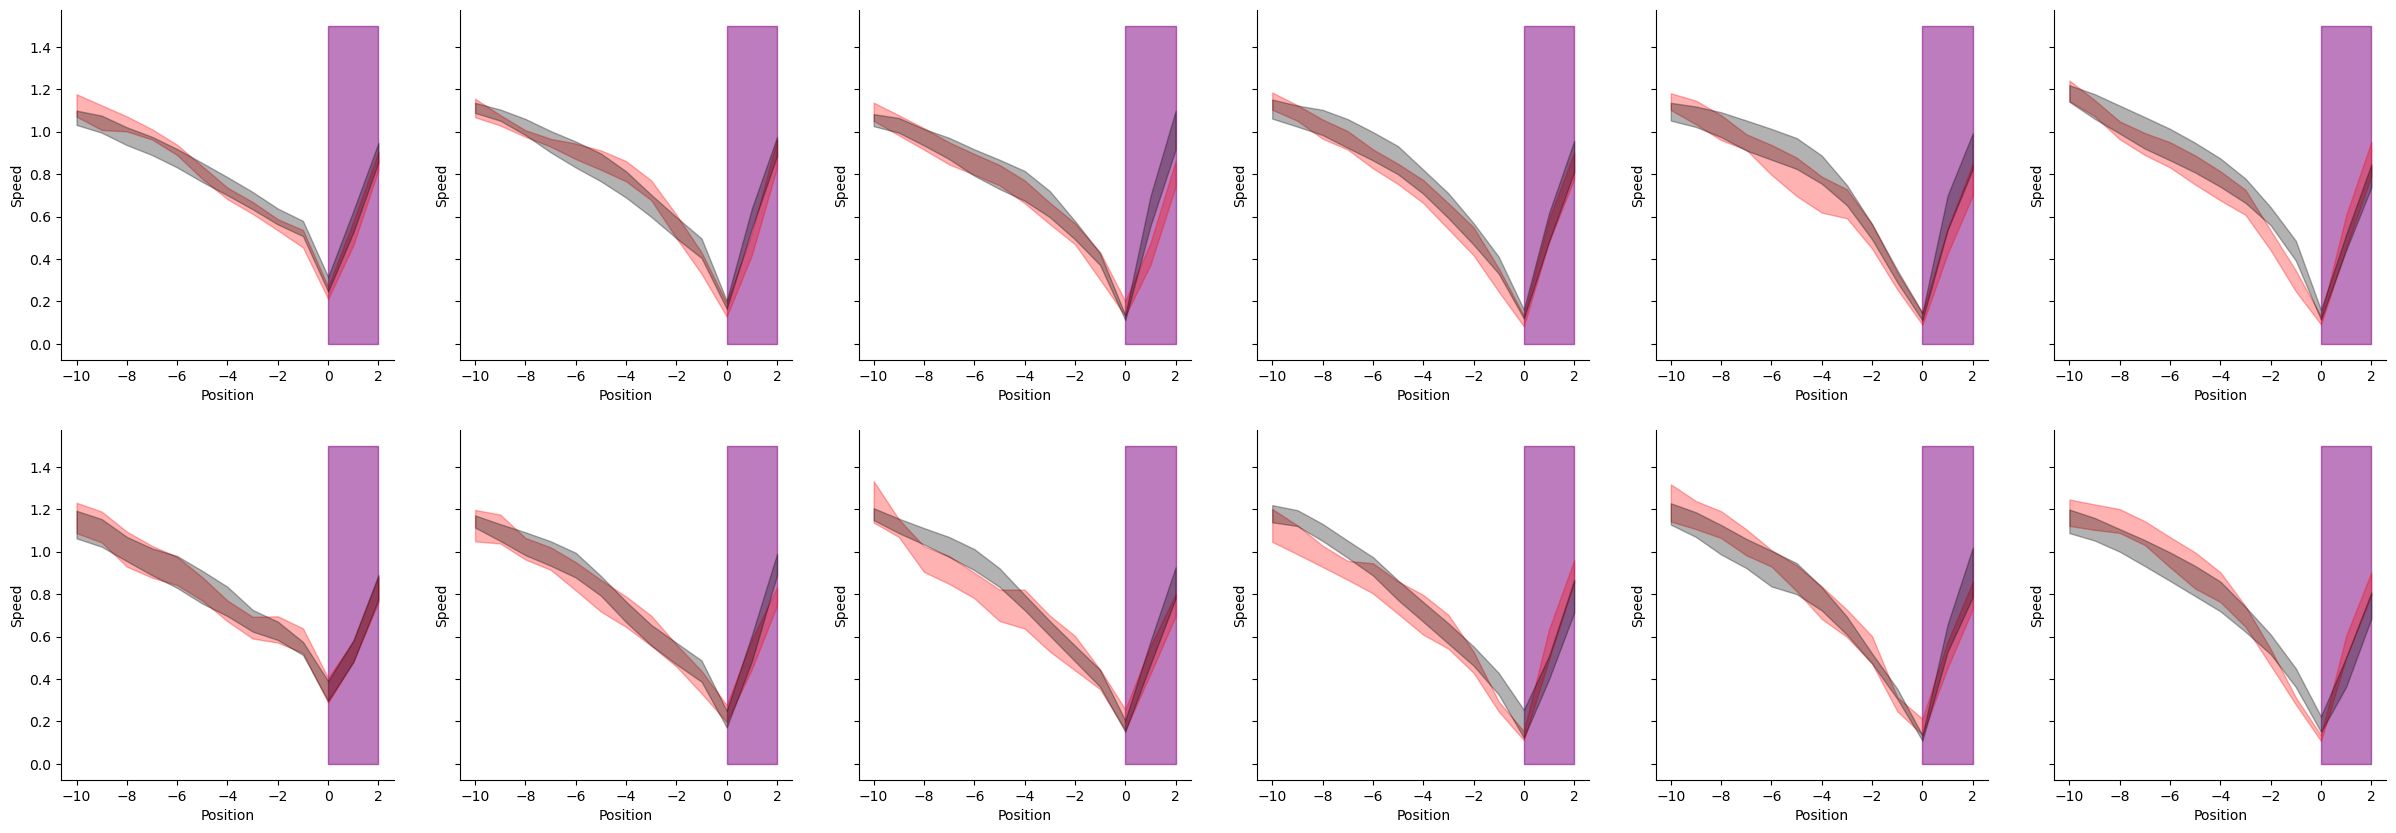

In [17]:



df = {'mouse':[],
      'ko':[],
      'day':[],
      'nov':[],
      'speed':[],
      'LR': [],
      'cov': []}

key = 'speed'
if key in ('licks', 'nonconsum_licks'):
    alpha = dt
elif key in ('speed'):
    alpha = dt*10
else:
    alpha = 1.
ko_lr, ctrl_lr = {}, {}
for day in range(6):
    ko_lr[day] = {'speed':{'fam':[],'nov':[]}, 'cov':{'fam':[], 'nov':[]}}
    
    x = np.arange(-10,3)
    for mouse in ko_mice:

        sess = u.load_vr_day(mouse,day, trial_mat_keys = ('licks','nonconsum_licks','licks_sum','speed'),verbose = False)
        bin_edges = sess.trial_matrices['bin_edges']
        for ax_ind, lr in enumerate([-1, 1]):
            trial_mask = sess.trial_info['LR']== lr
            df['LR'].append(lr)
            grand_mean = alpha*np.nanmean(sess.trial_matrices[key][trial_mask,:].ravel())
            std = np.nanstd(alpha*sess.trial_matrices[key][trial_mask,:]/grand_mean, axis=0)
            mu = np.nanmean(alpha*sess.trial_matrices[key][trial_mask,:]/grand_mean, axis=0) #/grandmean
            cov = std/mu
            # mu = 

            if sess.novel_arm ==-1:
                fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

            elif sess.novel_arm == 1:
                fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            if lr == sess.novel_arm:
                ko_lr[day]['cov']['nov'].append(cov[nov_rzone_front-10:nov_rzone_front+3])
                ko_lr[day]['speed']['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
                # ko_mu[day]['nov'].append(np.nanmean(mu[nov_rzone_front-3:nov_rzone_front]))
                
                _mu = np.nanmean(mu[nov_rzone_front-3:nov_rzone_front])
                _cov = np.nanmean(cov[nov_rzone_front-3:nov_rzone_front])
                df['mouse'].append(mouse)
                df['ko'].append(True)
                df['day'].append(day)
                df['nov'].append(True)
                df['speed'].append(_mu)
                df['cov'].append(_cov)
                
            else:
                ko_lr[day]['cov']['fam'].append(cov[fam_rzone_front-10:fam_rzone_front+3])
                ko_lr[day]['speed']['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
                # _fam = np.nanmean(mu[fam_rzone_front-10:fam_rzone_front-1])
                
                _mu = np.nanmean(mu[fam_rzone_front-3:fam_rzone_front])
                _cov = np.nanmean(cov[fam_rzone_front-3:fam_rzone_front])
                df['mouse'].append(mouse)
                df['ko'].append(True)
                df['day'].append(day)
                df['nov'].append(False)
                df['speed'].append(_mu)
                df['cov'].append(_cov)
                
                # ko_mu[day]['fam'].append(np.nanmean(mu[fam_rzone_front-3:fam_rzone_front]))
                
                    
                
       
                      

    ctrl_lr[day] = {'speed':{'fam':[],'nov':[]}, 'cov':{'fam':[], 'nov':[]}}
    x = np.arange(-10,3)
    for mouse in ctrl_mice:
        sess = u.load_vr_day(mouse,day, trial_mat_keys = ('licks','nonconsum_licks','licks_sum','speed'),verbose = False)
        bin_edges = sess.trial_matrices['bin_edges']
        for ax_ind, lr in enumerate([-1, 1]):
            trial_mask = sess.trial_info['LR']== lr
#             lick_mean = np.nanmean(sess.trial_matrices['licks_sum'][trial_mask,:].ravel())
            df['LR'].append(lr)
            
#             mu = dt*np.nanmean(sess.trial_matrices['nonconsum_licks'][trial_mask,:], axis=0)
            grand_mean = alpha*np.nanmean(sess.trial_matrices[key][trial_mask,:].ravel())
            std = np.nanstd(alpha*sess.trial_matrices[key][trial_mask,:]/grand_mean, axis=0)
            mu = np.nanmean(alpha*sess.trial_matrices[key][trial_mask,:]/grand_mean, axis=0) #/grandmean
            cov = std/mu

            if sess.novel_arm ==-1:

                fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

            elif sess.novel_arm == 1:
                fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
                nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]

            if lr == sess.novel_arm:
                ctrl_lr[day]['cov']['nov'].append(cov[nov_rzone_front-10:nov_rzone_front+3])
                ctrl_lr[day]['speed']['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])

                

                _mu = np.nanmean(mu[nov_rzone_front-3:nov_rzone_front])
                _cov = np.nanmean(cov[nov_rzone_front-3:nov_rzone_front])
                df['mouse'].append(mouse)
                df['ko'].append(False)
                df['day'].append(day)
                df['nov'].append(True)
                df['speed'].append(_mu)
                df['cov'].append(_cov)
                
            else:
                ctrl_lr[day]['cov']['fam'].append(cov[fam_rzone_front-10:fam_rzone_front+3])
                ctrl_lr[day]['speed']['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])

                _mu = np.nanmean(mu[fam_rzone_front-3:fam_rzone_front])
                _cov = np.nanmean(cov[fam_rzone_front-3:fam_rzone_front])
                df['mouse'].append(mouse)
                df['ko'].append(False)
                df['day'].append(day)
                df['nov'].append(False)
                df['speed'].append(_mu)
                df['cov'].append(_cov)
        
    
df = pd.DataFrame(df)

# normalized speed
fig,ax = plt.subplots(2,6, figsize = [30, 10],sharey=True)
for day in range(6):
    for ax_ind, lr in enumerate(['fam', 'nov']):
        arr = np.array(ko_lr[day]['speed'][lr])
        mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
        ax[ax_ind,day].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)

        arr = np.array(ctrl_lr[day]['speed'][lr])
        mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
        ax[ax_ind, day].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
   


    
        ax[ax_ind, day].fill_betweenx([0,1.5], 0, 2, zorder=-1, color='purple',alpha=.3)
        ax[ax_ind, day].fill_betweenx([0,1.5], 0, 2, zorder=-1, color='purple',alpha=.3)

        ax[ax_ind, day].set_xlabel('Position')
        ax[ax_ind, day].set_xlabel('Position')
        ax[ax_ind, day].set_ylabel('Speed')
        ax[ax_ind, day].spines['top'].set_visible(False)
        ax[ax_ind, day].spines['top'].set_visible(False)
        ax[ax_ind, day].spines['right'].set_visible(False)
        ax[ax_ind, day].spines['right'].set_visible(False)
        
        
        
# fig,ax = plt.subplots(2,6, figsize = [30, 10],sharey=True)
# for day in range(6):
#     for ax_ind, lr in enumerate(['fam', 'nov']):
#         arr = np.array(ko_lr[day]['cov'][lr])
#         mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
#         ax[ax_ind,day].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)

#         arr = np.array(ctrl_lr[day]['cov'][lr])
#         mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
#         ax[ax_ind, day].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
   


    
#         ax[ax_ind, day].fill_betweenx([0,1.5], 0, 2, zorder=-1, color='purple',alpha=.3)
#         ax[ax_ind, day].fill_betweenx([0,1.5], 0, 2, zorder=-1, color='purple',alpha=.3)

#         ax[ax_ind, day].set_xlabel('Position')
#         ax[ax_ind, day].set_xlabel('Position')
#         ax[ax_ind, day].set_ylabel('Speed COV')
#         ax[ax_ind, day].spines['top'].set_visible(False)
#         ax[ax_ind, day].spines['top'].set_visible(False)
#         ax[ax_ind, day].spines['right'].set_visible(False)
#         ax[ax_ind, day].spines['right'].set_visible(False)

        

fig_dir = 'C:/Users/esay/data/Stx3/YMazeResults/'
fig.savefig(os.path.join(fig_dir, 'famnov_speedCOV_alldays.pdf'))

In [16]:
df

,mouse,ko,day,nov,speed,LR,cov
0,4467975.1,True,0,True,0.593030,-1,0.348665
1,4467975.1,True,0,False,0.500654,1,0.370965
2,4467975.2,True,0,False,0.458188,-1,0.396358
3,4467975.2,True,0,True,0.410647,1,0.317303
4,4467975.3,True,0,True,0.668222,-1,0.217346
...,...,...,...,...,...,...,...
199,mCherry7,False,5,False,0.587014,1,0.488675
200,mCherry8,False,5,False,0.670214,-1,0.286544
201,mCherry8,False,5,True,0.642725,1,0.387620
202,mCherry9,False,5,False,0.371441,-1,0.608708


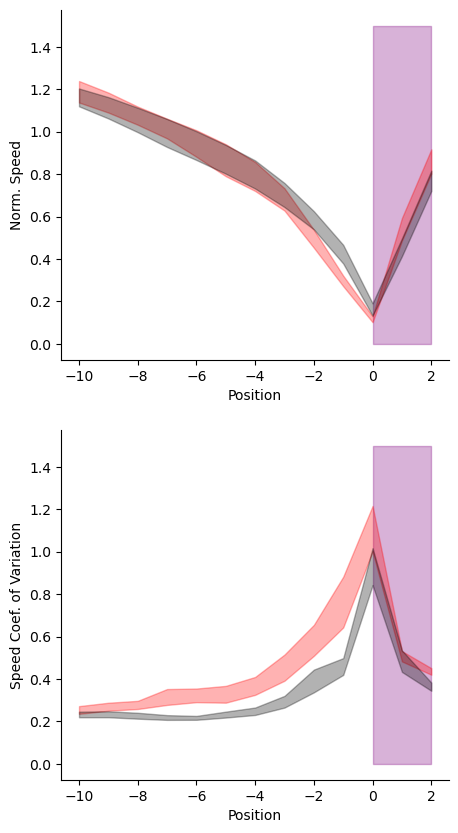

In [65]:
fig,ax = plt.subplots(2,1, figsize = [5, 10],sharey=True)
day = 5
x = np.arange(-10,3)




arr = np.concatenate((np.array(ko_lr[day]['speed']['fam'])[:,:,np.newaxis], np.array(ko_lr[day]['speed']['nov'])[:, :, np.newaxis]), axis=-1)
arr = arr.mean(axis=-1)
mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')

ax[0].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)

arr = np.concatenate((np.array(ctrl_lr[day]['speed']['fam'])[:,:,np.newaxis], np.array(ctrl_lr[day]['speed']['nov'])[:, :, np.newaxis]), axis=-1)
arr = arr.mean(axis=-1)
mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')

ax[0].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
ax[0].fill_betweenx([0,1.5], 0, 2, zorder=-1, color='purple',alpha=.3)

ax[0].set_ylabel('Norm. Speed')
ax[0].set_xlabel('Position')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


arr = np.concatenate((np.array(ko_lr[day]['cov']['fam'])[:,:,np.newaxis], np.array(ko_lr[day]['cov']['nov'])[:, :, np.newaxis]), axis=-1)
arr = arr.mean(axis=-1)
mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')

ax[1].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)

arr = np.concatenate((np.array(ctrl_lr[day]['cov']['fam'])[:,:,np.newaxis], np.array(ctrl_lr[day]['cov']['nov'])[:, :, np.newaxis]), axis=-1)
arr = arr.mean(axis=-1)
mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')

ax[1].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)

ax[1].fill_betweenx([0,1.5], 0, 2, zorder=-1, color='purple',alpha=.3)

ax[1].set_ylabel('Speed Coef. of Variation')
ax[1].set_xlabel('Position')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(fig_dir, 'day6_normspeed_COV.pdf'))

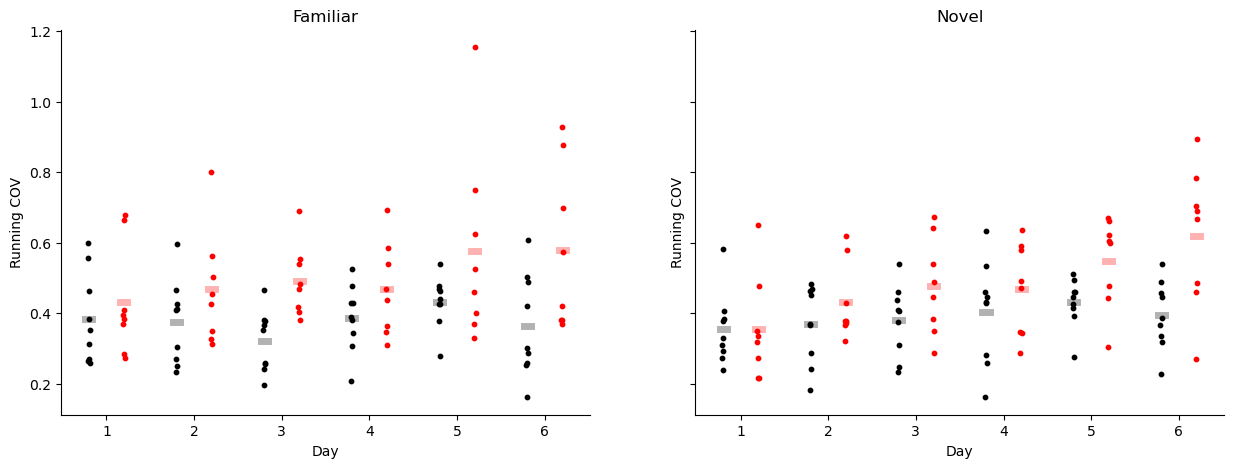

In [60]:
fig, ax = plt.subplots(1,2, figsize=[15,5], sharey=True)

lw = 5
s = 10
key = 'cov'
for day in range(6):
    
    mask = (df['ko']==False) & (df['day']==day) & (df['nov']==False)
    lr = df[key].loc[mask]._values
    ax[0].scatter(5*day -1 + np.linspace(-0.05, 0.05, num=lr.shape[0]), lr, color='black', s=s)
    ax[0].plot(5*day -1 + np.array([-0.2, .2]), lr.mean()*np.ones([2,]), color='black', linewidth=lw,alpha = .3)
    
    mask = (df['ko']==False) & (df['day']==day) & (df['nov']==True)
    lr = df[key].loc[mask]._values
    ax[1].scatter(5*day -1 + np.linspace(-0.05, 0.05, num=lr.shape[0]), lr, color='black', s=s, alpha = 1)
    ax[1].plot(5*day -1 + np.array([-0.2, .2]), lr.mean()*np.ones([2,]), color='black', linewidth=lw,alpha = .3)
    
    mask = (df['ko']==True) & (df['day']==day) & (df['nov']==False)
    lr = df[key].loc[mask]._values
    ax[0].scatter(5*day +1 + np.linspace(-0.05, 0.05, num=lr.shape[0]), lr, color='red', s=s)
    ax[0].plot(5*day + 1 + np.array([-0.2, .2]), lr.mean()*np.ones([2,]), color='red', linewidth=lw,alpha = .3)
    
    mask = (df['ko']==True) & (df['day']==day)& (df['nov']==True)
    lr = df[key].loc[mask]._values
    ax[1].scatter(5*day +1 + np.linspace(-0.05, 0.05, num=lr.shape[0]), lr, color='red', s=s, alpha=1)
    ax[1].plot(5*day + 1 + np.array([-0.2, .2]), lr.mean()*np.ones([2,]), color='red', linewidth=lw,alpha = .3)
    
ax[0].set_title('Familiar')
ax[1].set_title('Novel')
    
for a in range(2):

    ax[a].set_xticks(np.arange(0,6*5,5))
    ax[a].set_xticklabels([x for x in range(1,7)])

    ax[a].spines['top'].set_visible(False)
    ax[a].spines['right'].set_visible(False)

    ax[a].set_ylabel('Running COV')
    ax[a].set_xlabel('Day')

fig.savefig(os.path.join(fig_dir, 'famnov_speed_COV_summary.pdf'))

In [61]:

aov = mixed_anova(data=df[df['nov']==False], dv='cov', between='ko', within='day', subject='mouse')
print(aov)
print(aov['p-unc'].iloc[1])

posthoc = pairwise_ttests(data=df[df['nov']==False], dv='cov', between='ko', within='day', subject='mouse', padjust = 'holm')
print(posthoc)

        Source        SS  DF1  DF2        MS         F     p-unc  p-GG-corr  \
0           ko  0.395668    1   15  0.395668  9.988894  0.006466        NaN   
1          day  0.126715    5   75  0.025343  1.327126  0.261961   0.274127   
2  Interaction  0.081413    5   75  0.016283  0.852667  0.517011        NaN   

        np2       eps sphericity  W-spher   p-spher  
0  0.399733       NaN        NaN      NaN       NaN  
1  0.081284  0.549124      False  0.08233  0.001555  
2  0.053787       NaN        NaN      NaN       NaN  
0.26196054432132265
    Contrast day      A     B Paired  Parametric         T        dof  \
0        day   -    0.0   1.0   True        True -0.253868  16.000000   
1        day   -    0.0   2.0   True        True  0.129484  16.000000   
2        day   -    0.0   3.0   True        True -0.417773  16.000000   
3        day   -    0.0   4.0   True        True -1.423245  16.000000   
4        day   -    0.0   5.0   True        True -0.917416  16.000000   
5        

/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)
/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/home/mplitt/

In [62]:
aov = mixed_anova(data=df[df['nov']==True], dv='cov', between='ko', within='day', subject='mouse')
print(aov)

posthoc = pairwise_ttests(data=df[df['nov']==True], dv='cov', between='ko', within='day', subject='mouse', padjust = 'holm')
print(posthoc)

        Source        SS  DF1  DF2        MS         F     p-unc  p-GG-corr  \
0           ko  0.224293    1   15  0.224293  6.103444  0.025972        NaN   
1          day  0.254986    5   75  0.050997  4.405074  0.001431   0.012746   
2  Interaction  0.119157    5   75  0.023831  2.058517  0.080068        NaN   

        np2       eps sphericity   W-spher   p-spher  
0  0.289216       NaN        NaN       NaN       NaN  
1  0.227006  0.564458      False  0.139307  0.016395  
2  0.120674       NaN        NaN       NaN       NaN  
    Contrast day      A     B Paired  Parametric         T        dof  \
0        day   -    0.0   1.0   True        True -1.444882  16.000000   
1        day   -    0.0   2.0   True        True -1.797325  16.000000   
2        day   -    0.0   3.0   True        True -1.832810  16.000000   
3        day   -    0.0   4.0   True        True -3.253053  16.000000   
4        day   -    0.0   5.0   True        True -2.531903  16.000000   
5        day   -    1.0  

/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)
/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/pingouin/pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
/home/mplitt/

In [18]:
df_ =df[df['day']<5]
lmm_res = MixedLM(df_['lickrate'], df_[['ko', 
                                       'day_norm', 
                                       'nov', 
                                       'lr', 
                                       'ko_x_day', 
                                       'ko_x_nov', 
                                       'intercept']], df_['mouse'], exog_re = df_['day_norm'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.bse_fe)
print(lmm_resf.pvalues)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: lickrate 
No. Observations: 170     Method:             REML     
No. Groups:       17      Scale:              0.5077   
Min. group size:  10      Log-Likelihood:     -203.9642
Max. group size:  10      Converged:          Yes      
Mean group size:  10.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
ko           -0.904    0.280 -3.232 0.001 -1.453 -0.356
day_norm     -0.719    0.512 -1.406 0.160 -1.722  0.284
nov           0.083    0.151  0.549 0.583 -0.213  0.378
lr            0.542    0.111  4.865 0.000  0.323  0.760
ko_x_day     -0.708    0.746 -0.949 0.342 -2.170  0.754
ko_x_nov      0.146    0.223  0.656 0.512 -0.290  0.582
intercept     2.758    0.198 13.948 0.000  2.371  3.146
day_norm Var  1.442    0.865                           



In [4]:
sess = u.load_vr_day(ko_mice[7], 5)

{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}


({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}, {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1})
{'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 2}
{'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 3}
{'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 4}
{'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}
({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 7}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 2, 'scan': 10, 'novel_arm': -1, 'ravel_ind': 8})


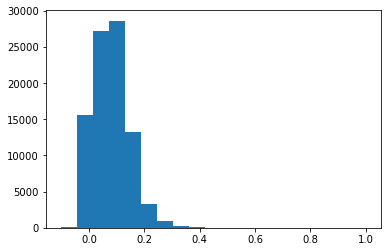

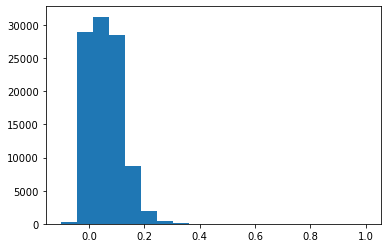

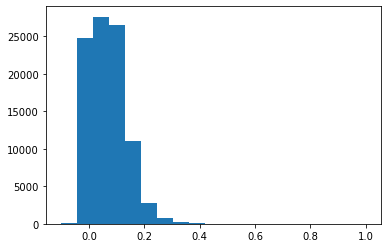

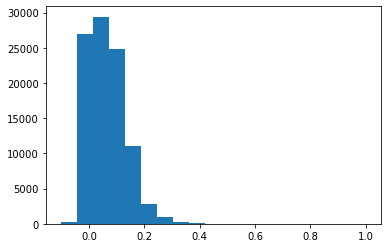

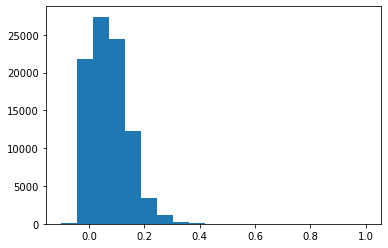

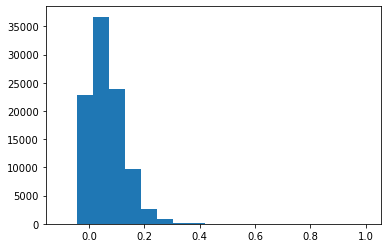

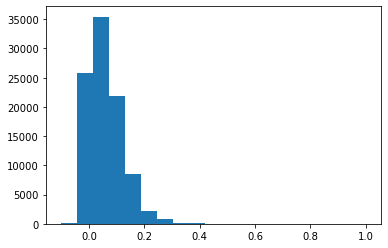

In [13]:
for i in range(7):
    sess = u.load_vr_day(ko_mice[0],i)
    fig,ax = plt.subplots()
    ax.hist(sess.timeseries['speed'].ravel(), bins = np.linspace(-.1,1, num=20))

{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 0}


<ipython-input-14-b3dc6793d03c>:8: RuntimeWarning: Mean of empty slice.
  ax[0].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-14-b3dc6793d03c>:10: RuntimeWarning: Mean of empty slice.
  ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'black' )
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 18, 'novel_arm': 1, 'ravel_ind': 1}


<ipython-input-14-b3dc6793d03c>:8: RuntimeWarning: Mean of empty slice.
  ax[0].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-14-b3dc6793d03c>:10: RuntimeWarning: Mean of empty slice.
  ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'black' )
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-14-b3dc6793d03c>:8: RuntimeWarning: Mean of empty slice.
  ax[0].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invali

{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '14_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 0}


<ipython-input-14-b3dc6793d03c>:8: RuntimeWarning: Mean of empty slice.
  ax[0].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-14-b3dc6793d03c>:10: RuntimeWarning: Mean of empty slice.
  ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'black' )
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'date': '14_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 0}


<ipython-input-14-b3dc6793d03c>:8: RuntimeWarning: Mean of empty slice.
  ax[0].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-14-b3dc6793d03c>:10: RuntimeWarning: Mean of empty slice.
  ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'black' )
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'date': '14_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '15_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 0}


<ipython-input-14-b3dc6793d03c>:8: RuntimeWarning: Mean of empty slice.
  ax[0].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-14-b3dc6793d03c>:10: RuntimeWarning: Mean of empty slice.
  ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'black' )
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-14-b3dc6793d03c>:18: RuntimeWarning: Mean of empty slice.
  ax[1].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: inval

({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}, {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1})
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}


<ipython-input-14-b3dc6793d03c>:18: RuntimeWarning: Mean of empty slice.
  ax[1].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-14-b3dc6793d03c>:20: RuntimeWarning: Mean of empty slice.
  ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'red' )
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}


<ipython-input-14-b3dc6793d03c>:18: RuntimeWarning: Mean of empty slice.
  ax[1].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-14-b3dc6793d03c>:20: RuntimeWarning: Mean of empty slice.
  ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'red' )
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-14-b3dc6793d03c>:18: RuntimeWarning: Mean of empty slice.
  ax[1].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invali

{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': -1, 'novel_arm': -1, 'ravel_ind': 0}


<ipython-input-14-b3dc6793d03c>:18: RuntimeWarning: Mean of empty slice.
  ax[1].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
<ipython-input-14-b3dc6793d03c>:20: RuntimeWarning: Mean of empty slice.
  ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'red' )
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.0, 0.25)

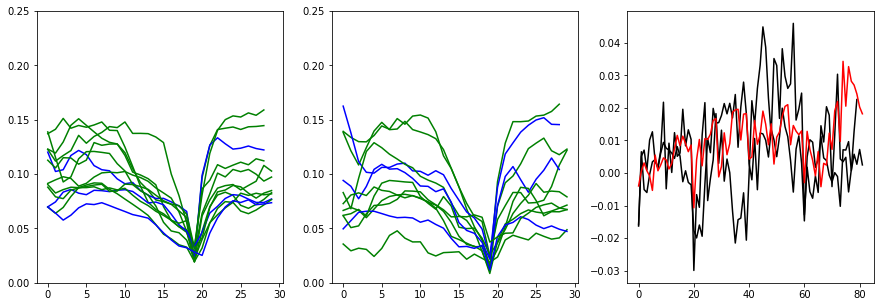

In [14]:
fig,ax = plt.subplots(1,3, figsize=[15,5])

for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,0)
    left_post = (sess.trial_info['LR']==-1) & (sess.trial_info['block_number']>=2)
    ax[0].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=0), color= 'green')
    left_pre = (sess.trial_info['LR']==-1) & (sess.trial_info['block_number']<2)
    ax[0].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
    
    ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'black' )

    
for mouse in ko_mice:
    sess = u.load_vr_day(mouse,0)
    left_post = (sess.trial_info['LR']==-1) & (sess.trial_info['block_number']>=2)
    ax[1].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=0), color= 'green')
    left_pre = (sess.trial_info['LR']==-1) & (sess.trial_info['block_number']<2)
    ax[1].plot(sess.trial_matrices['speed'][left_pre,:].mean(axis=0), color='blue')
    
    ax[2].plot(sess.trial_matrices['speed'][left_post,:].mean(axis=1) - sess.trial_matrices['speed'][left_pre,:].mean(), color = 'red' )
    
ax[0].set_ylim([0,.25])
ax[1].set_ylim([0,.25])
    

{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 6}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 7}
{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '19_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '19_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '20_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '21_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}


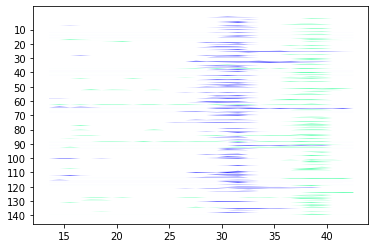

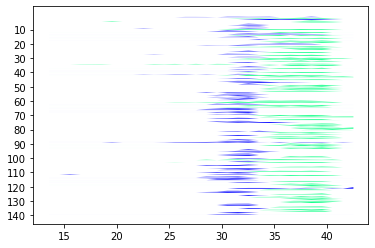

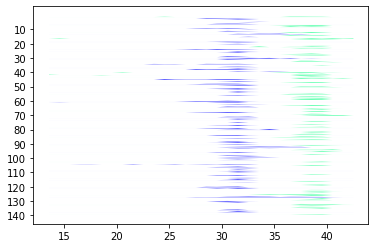

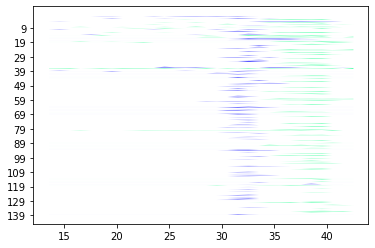

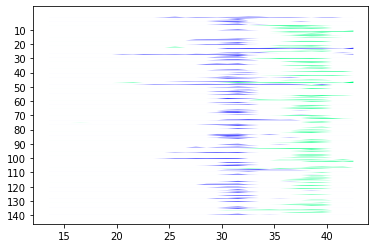

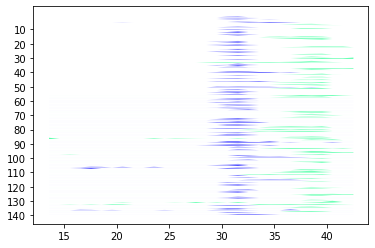

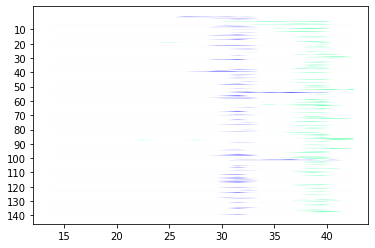

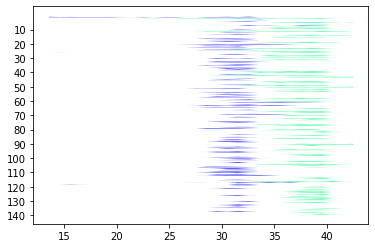

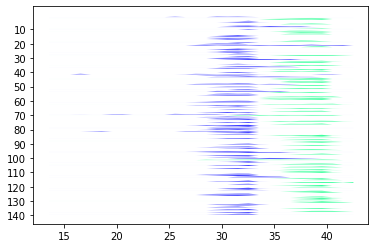

In [18]:
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,5)
    
#     fig,ax = plt.subplots()
    fig, ax = tpu.utilities.smooth_raster(sess.trial_matrices['bin_centers'],sess.trial_matrices['licks'],vals = sess.trial_info['LR'],cmap='winter')
    